In [35]:
#The dataset is ... The purpose is to ... 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #For Training and test sets
from sklearn.linear_model import LinearRegression #Building Linear Regression 
from sklearn import metrics #Checking accuracy of model 
import statsmodels.api as sm
import seaborn as sns 



In [7]:
covid_word = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
covid_word

# Dataset has 122175 rows × 65 columns

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122372,ZWE,Africa,Zimbabwe,2021-10-05,131205.0,76.0,133.286,4627.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122373,ZWE,Africa,Zimbabwe,2021-10-06,131434.0,229.0,135.571,4630.0,3.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122374,ZWE,Africa,Zimbabwe,2021-10-07,131523.0,89.0,100.429,4631.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
122375,ZWE,Africa,Zimbabwe,2021-10-08,131705.0,182.0,96.714,4634.0,3.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [8]:
covid_word.info() #Providing info on our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122377 entries, 0 to 122376
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 122377 non-null  object 
 1   continent                                116808 non-null  object 
 2   location                                 122377 non-null  object 
 3   date                                     122377 non-null  object 
 4   total_cases                              116124 non-null  float64
 5   new_cases                                116120 non-null  float64
 6   new_cases_smoothed                       115106 non-null  float64
 7   total_deaths                             105293 non-null  float64
 8   new_deaths                               105446 non-null  float64
 9   new_deaths_smoothed                      115106 non-null  float64
 10  total_cases_per_million         

In [9]:
fields = ['iso_code', 'continent', 'location', 'tests_units']

In [10]:
#Changing Data Types of Field
covid_word['tests_units'] = covid_word['tests_units'].astype('category')
covid_word['location'] = covid_word['location'].astype('category')
covid_word['continent'] = covid_word['continent'].astype('category')
covid_word['iso_code'] = covid_word['iso_code'].astype('category')
#The following variables above are changed to a categorical variable 



In [11]:
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])

In [12]:
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,122377,116808,122377,65054
unique,233,6,233,4
top,MEX,Africa,Mexico,tests performed
freq,648,31027,648,40953


In [13]:
covid_word['tests_units'].cat.categories 
#4 Categories are 'people tested', 'samples tested', 'tests performed', 'units unclear'


Index(['people tested', 'samples tested', 'tests performed', 'units unclear'], dtype='object')

In [14]:
#Grouping data

covid_word['tests_units'].value_counts().to_frame()

,tests_units
tests performed,40953
people tested,12243
samples tested,10663
units unclear,1195


In [15]:
covid_word.groupby('tests_units')


In [16]:
#The Amount of People who are Sick by Test Unit Category 

pd.options.display.float_format = '{:,.0f}'.format
covid_word.groupby('tests_units')['total_cases'].sum().sort_values(ascending=False).to_frame()

,total_cases
tests_units,
tests performed,"30,488,409,127"
samples tested,"8,429,049,981"
people tested,"6,893,942,217"
units unclear,"95,795,586"


In [17]:
#DataSet Transformation: predict spread of COVID-19 to different continents
#Create a Pivot Table

p_covid = pd.pivot_table(covid_word, values= 'total_cases', index= ['date'], columns=['continent'], aggfunc='sum', margins=False)
p_covid

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-10-05,"8,353,554","76,474,161","60,070,823","52,852,882","194,954","37,877,514"
2021-10-06,"8,366,236","76,647,301","60,234,000","52,989,474","197,530","37,902,645"
2021-10-07,"8,374,299","76,751,743","60,396,445","53,119,973","200,415","37,926,204"


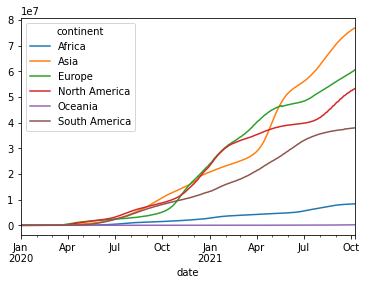

In [18]:
#Visualize new dataset

p_covid.plot()
import matplotlib.pyplot as plt
plt.show()

In [19]:
#Eliminating missing data from P_covid
p_covid = p_covid.dropna()
p_covid

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-10-05,"8,353,554","76,474,161","60,070,823","52,852,882","194,954","37,877,514"
2021-10-06,"8,366,236","76,647,301","60,234,000","52,989,474","197,530","37,902,645"
2021-10-07,"8,374,299","76,751,743","60,396,445","53,119,973","200,415","37,926,204"


In [20]:
#Correlation Analysis
# Hypothesis: The number of total cases in Africa depends on the one on other continents.
# Null: The number of total cases in Africa doesn't depend on the one on other continents.
pd.options.display.float_format = '{:,.2f}'.format
p_covid.corr()

#See a close linear relationship between Africa and other continents in regards to COVID-19

continent,Africa,Asia,Europe,North America,Oceania,South America
continent,,,,,,
Africa,1.00,0.98,0.98,0.98,0.90,0.99
Asia,0.98,1.00,0.96,0.95,0.90,0.99
Europe,0.98,0.96,1.00,0.99,0.81,0.98
North America,0.98,0.95,0.99,1.00,0.81,0.98
Oceania,0.90,0.90,0.81,0.81,1.00,0.85
South America,0.99,0.99,0.98,0.98,0.85,1.00


In [21]:
#Split dataset: training and test sets

proportion_train_test = 0.7
l = int(proportion_train_test * len(p_covid))
col = p_covid.columns

In [22]:
#Slices:
X_train, X_test, y_train, y_test = p_covid[col[1:]][:l], p_covid[col[1:]][l:], p_covid[col[0]][:l], p_covid[col[0]][l:]

In [23]:
#Implementing sklearn function

X_train, X_test, y_train, y_test = train_test_split(p_covid[col[1:]], p_covid[col[0]], test_size=0.3, shuffle=False)

In [24]:
#Creating linear regression models using sklearn

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)




In [28]:


print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


Correlation train 0.9992158940766539
Correlation test 0.713610384345201
Coefficients: [-0.00434233 -0.03605163  0.09233108 -0.87932717  0.12490334]
Pair the feature names with the coefficients:
Asia : -0.0043423328756776675
Europe : -0.03605163371814475
North America : 0.09233107877930047
Oceania : -0.8793271728702882
South America : 0.12490334257960724
Intercept -13968.074369703187
Mean Absolute Error (train): 32375.984617007172
Mean Absolute Error (test): 597408.8230098083
Mean Squared Error (train): 1468772920.6624813
Mean Squared Error (test): 593618508855.9282
Root Mean Squared Error (train): 38324.57332655488
Root Mean Squared Error (test): 770466.422925703


In [30]:
#Generating a summary report - create models with statsmodels

model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred_test_OLS = results.predict(X_test)
y_pred_train_OLS = results.predict(X_train)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Africa   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.189e+05
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        02:28:30   Log-Likelihood:                         -5430.0
No. Observations:                 453   AIC:                                  1.087e+04
Df Residuals:                     448   BIC:                                  1.089e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [32]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params, sep = '\n')

coefficient of determination: 0.9995908771540256
adjusted coefficient of determination: 0.999586311050834
regression coefficients:
Asia            -0.00
Europe          -0.04
North America    0.09
Oceania         -2.49
South America    0.13
dtype: float64


In [33]:
#Compare the results from the two models by joining them in a dataset

df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_OLS': y_pred_test_OLS})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_OLS': y_pred_train_OLS})
df = df_train.join(df_test, how='outer')
df

,Actual_train,Predicted_train,Predicted_train_OLS,Actual_test,Predicted_test,Predicted_test_OLS
date,,,,,,
2020-01-01,0.00,"-13,968.07",0.00,NaN,NaN,NaN
2020-01-02,0.00,"-13,968.07",0.00,NaN,NaN,NaN
2020-01-03,0.00,"-13,968.07",0.00,NaN,NaN,NaN
2020-01-04,0.00,"-13,968.07",0.00,NaN,NaN,NaN
2020-01-05,0.00,"-13,968.07",0.00,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-10-05,NaN,NaN,NaN,"8,353,554.00","6,927,867.72","6,770,598.24"
2021-10-06,NaN,NaN,NaN,"8,366,236.00","6,934,718.58","6,773,405.86"
2021-10-07,NaN,NaN,NaN,"8,374,299.00","6,940,863.50","6,774,883.41"


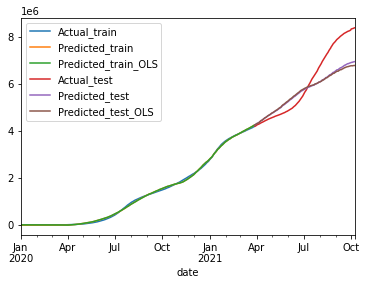

In [34]:
#Visualize model from above
df.plot()
plt.show()

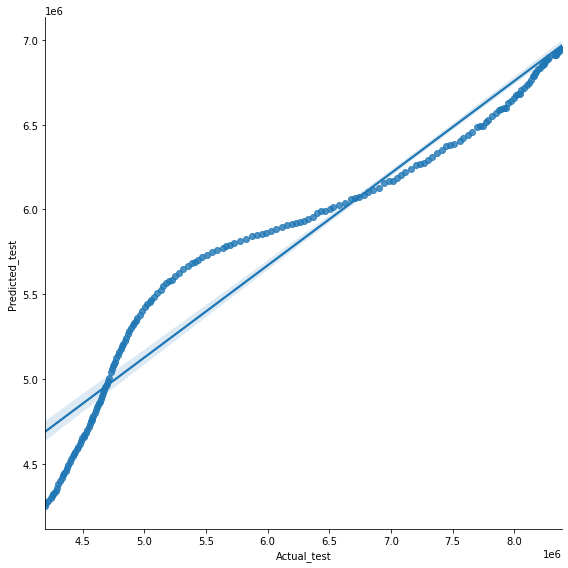

In [36]:
#Forecast vs. Real Data - Examining through a Plot

sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test', kind='reg', height=8)
plt.show()